# WEEK-9: IMAGE RECONSTRUCTION AND IMAGE DENOISING USING AUTOENCODERS

# Q1. IMAGE RECONSTRUCTION USING AUTOENCODER

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize


# . Preprocessing the CIFAR-10 Dataset

In [4]:

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


# b. Convolutional Autoencoder Architecture

In [5]:
input_img = Input(shape=(32, 32, 3))  


x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)


x = Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928 

2025-10-09 08:56:33.946064: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-09 08:56:34.145183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-09 08:56:34.149553: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# c. Train the Autoencoder

In [6]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20


2025-10-09 08:56:52.351458: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-10-09 08:56:53.042261: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x73c73365e0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-09 08:56:53.042281: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-10-09 08:56:53.064044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-09 08:56:53.208223: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 [==============================] - 6s 9ms/step - loss: 0.0106 - val_loss: 0.0057
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 4/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 5/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 9/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 11/2

# d. Evaluate and Visualize Reconstructions

313/313 [==============================] - 0s 756us/step


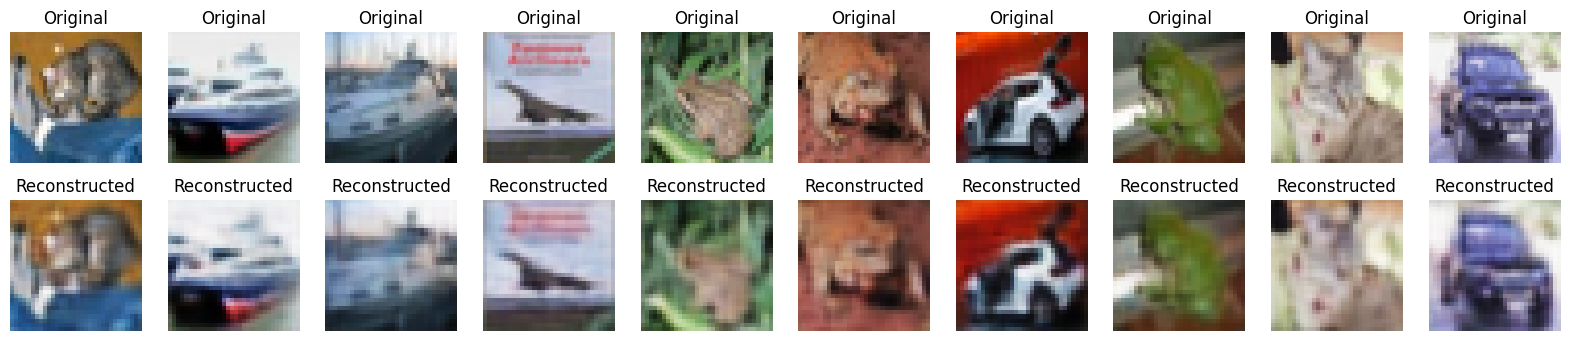

In [7]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


# Q2. IMAGE DENOISING USING AUTOENCODER

# a. Preprocessing (same as before)

In [9]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


# b. Add Noise to the Images

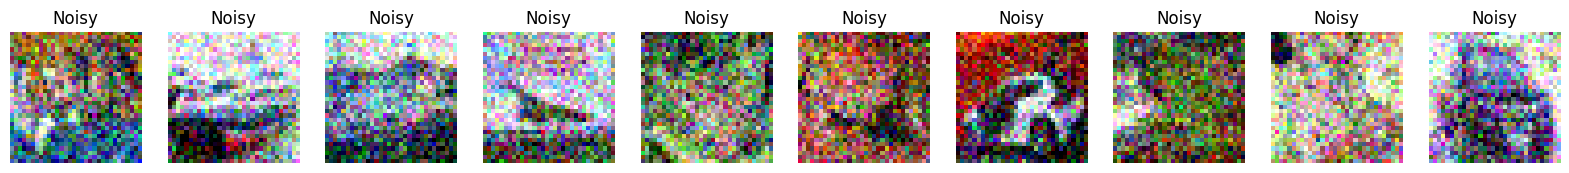

In [10]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")
plt.show()


# c. Train Autoencoder for Denoising

In [11]:
autoencoder_denoise = Model(input_img, decoded)
autoencoder_denoise.compile(optimizer=Adam(1e-3), loss='mse')
history_denoise = autoencoder_denoise.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 7/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 8/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 9/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0045 - val_loss: 0.0044

# d. Evaluate and Visualize Denoising Results

313/313 [==============================] - 0s 815us/step


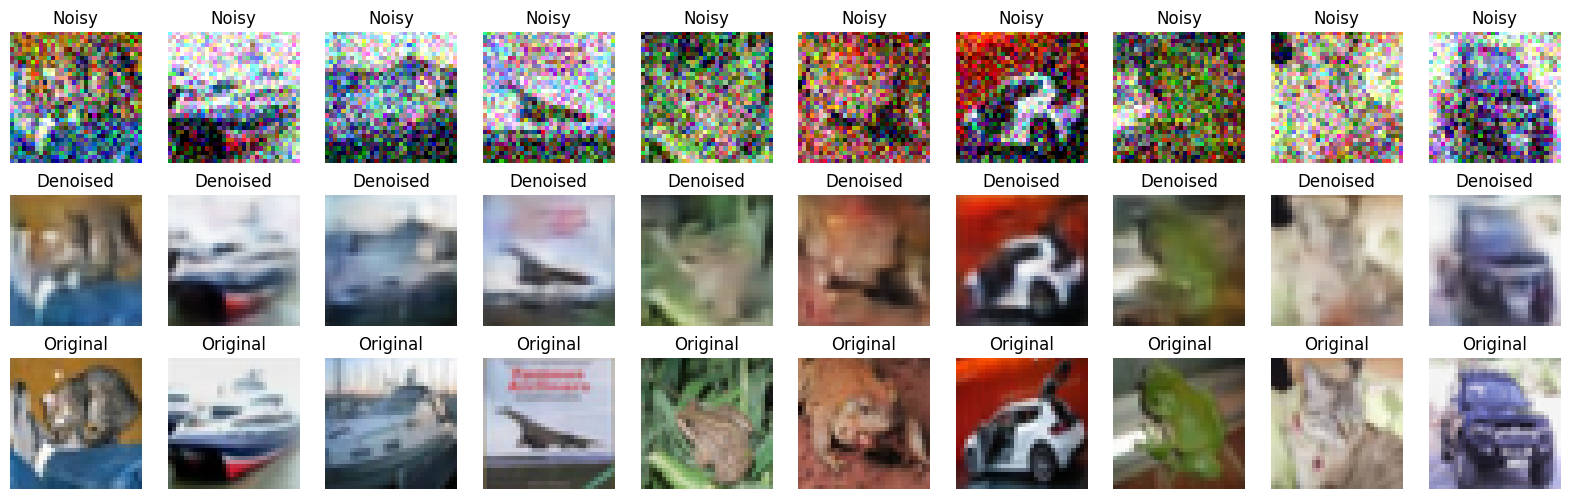

In [12]:
decoded_denoised = autoencoder_denoise.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_denoised[i])
    plt.title("Denoised")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
plt.show()


# Performance Metrics

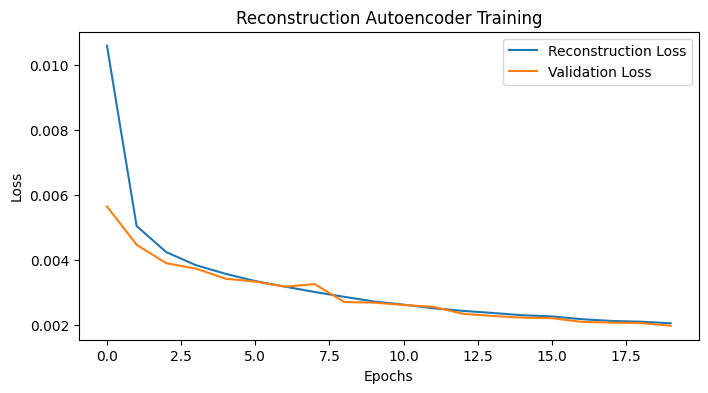

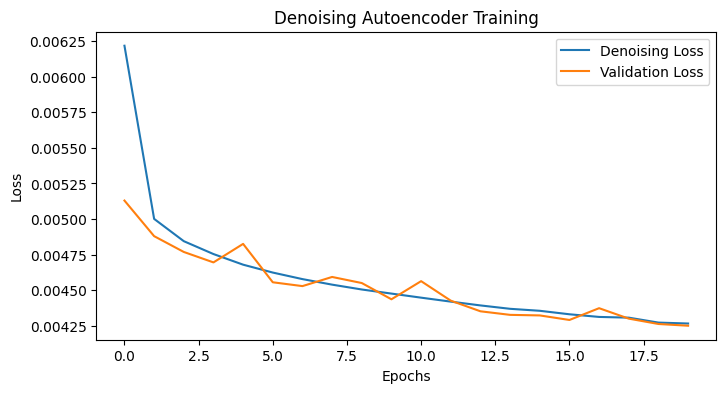

In [13]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Reconstruction Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Reconstruction Autoencoder Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_denoise.history['loss'], label='Denoising Loss')
plt.plot(history_denoise.history['val_loss'], label='Validation Loss')
plt.title("Denoising Autoencoder Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
